# Notebook Power Prices Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
import requests
from requests_kerberos import HTTPKerberosAuth
import os 
os.chdir(r'C:\Users\rmolli\Desktop\Power-Europe\Data')
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Definition de la fonction de prix Medeco

proxyAddress = 'http://proxymwg:8080'
medeco_protocol = 'https'
medeco_server = 'api-medeco.dts.corp.local'
medeco_server_NP1 = 'api-medeco-dev.dts.corp.local:'
medeco_port = ''
medeco_dt_format ='%Y-%m-%d'

def medeco_get_values(medeco_series: str, dt_from: dt.datetime, dt_to: dt.datetime, radicalDef: str,
					  frequency: float = 1, server = 'prod', format='df'):

	'''Function that fetches data from Medeco through the Rest API

	-----------PARAMETERS------------------

	medeco_series: the medeco series you want to get as string, catalog included with forwardness but without radical (eg: mu.LNG_JKM.1LI.)
	dt_from: date from which you want to get the data, must be a datetime.datetime
	dt_to: date until which you want to get the data, must be a datetime.datetime
	radicalDef: the radical you want to get for your medeco series (eg: .P for the price on a forward curve), must be a string
	frequency: the frequency on which you want to get the data, must be an number (1 for Daily, 2 for Weekdays and 10 for Monthly)
	server: the server you want to get the data from (dev for test database and prod for prod database)
	format: the format you want to get the data in (df to get a pandas.DataFrame, serie for a pandas.Series, else it will be a dict)

	----------------------------------------'''

	serv = medeco_server if server.lower() == 'prod' else medeco_server_NP1
	url = medeco_protocol + '://' + serv + medeco_port + '/api/series/' + medeco_series.replace('@', '%40') + '/values?'
	parameters = {'from': dt_from.strftime(medeco_dt_format),
				  'to': dt_to.strftime(medeco_dt_format),
				  'radical': radicalDef, 'frequency': int(frequency)}

	req = requests.get(url, auth=HTTPKerberosAuth(), verify=False, params=parameters)
	response = req.json()

	if format.lower() == 'df':
		result = pd.DataFrame.from_dict(response['values'])
		result.set_index(keys= 'date', drop= True, inplace= True)
	elif format.lower() == 'serie':
		result = pd.Series(response['values'])
	else:
		result = response['values']

	return result

In [4]:
times_series = ['mu.ELEC_FR.DLI.']
countries_series = ['France DA (EUR/MWh)']

dates_series = pd.date_range(dt.date(2021,12,1),dt.date.today()-dt.timedelta(days=1),freq='d')
prices = pd.DataFrame(index = dates_series.strftime(medeco_dt_format)) 
prices.index.name = 'Date'

for name in times_series :
    prices_series = medeco_get_values(name, dt.date(2021,12,1), dt.date.today(), radicalDef = "B" , server = 'prod', format = 'df' )
    prices_series = prices_series.astype(float)
    prices_series.columns = [name]
    prices_series.loc[prices_series[name] == 'NaN'] = np.NaN 
    prices = pd.concat([prices,prices_series], axis = 1)

prices.columns = countries_series
prices.index.name = 'Date'
prices.dropna(axis = 0, inplace = True)
prices.to_csv("French Power Prices Medeco.txt", sep = ',')
prices

,France DA (EUR/MWh)
Date,
2021-12-01,277.77
2021-12-02,299.22
2021-12-03,222.17
2021-12-06,258.65
2021-12-07,247.43
...,...
2022-08-01,471.64
2022-08-02,508.48
2022-08-03,482.37


Rafraichir le script a partir de cette ligne si les prix sont a jour.

In [5]:
prices = pd.read_csv("French Power Prices Medeco.txt")
prices["Date"] = pd.to_datetime(prices["Date"])
prices.head()

,Date,France DA (EUR/MWh)
0,2021-12-01,277.77
1,2021-12-02,299.22
2,2021-12-03,222.17
3,2021-12-06,258.65
4,2021-12-07,247.43


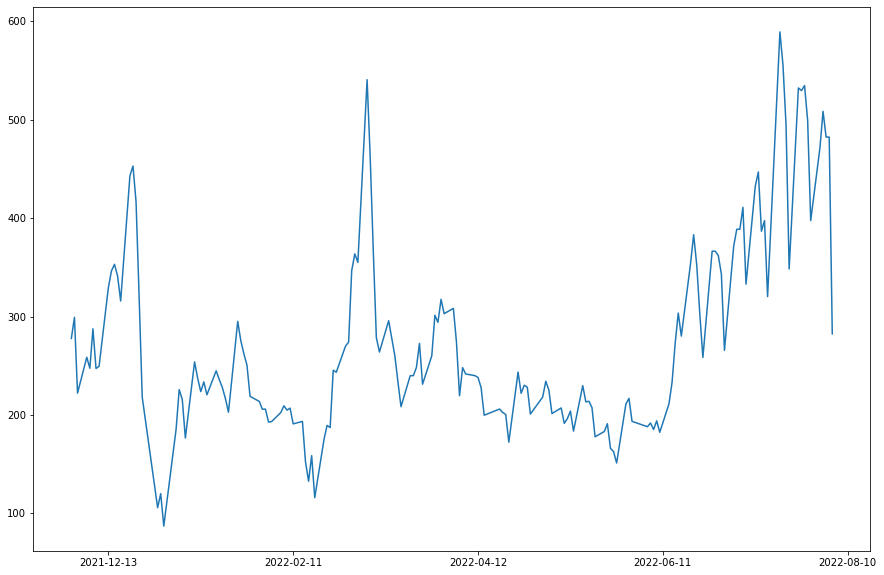

In [6]:
plt.figure(figsize = (15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 60))
plt.plot( prices['Date'], prices['France DA (EUR/MWh)']);

In [7]:
Data preprocessing

SyntaxError: invalid syntax (3286517981.py, line 1)